In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train3.csv')
test=pd.read_csv('test3.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
pd.factorize(train.department)[0]

array([0, 1, 0, ..., 3, 0, 7], dtype=int64)

In [8]:
train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [9]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [10]:
department=pd.factorize(train.department)[0]

In [11]:
department

array([0, 1, 0, ..., 3, 0, 7], dtype=int64)

In [12]:
train[['employee_id', 'department']]

,employee_id,department
0,65438,Sales & Marketing
1,65141,Operations
2,7513,Sales & Marketing
3,2542,Sales & Marketing
4,48945,Technology
...,...,...
54803,3030,Technology
54804,74592,Operations
54805,13918,Analytics
54806,13614,Sales & Marketing


In [13]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [14]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(value=train['previous_year_rating'].median())

In [16]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [17]:
train=train.drop('recruitment_channel',axis=1)

In [18]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
train=train.drop('recruitment_channel\t',axis=1)

KeyError: "['recruitment_channel\\t'] not found in axis"

In [20]:
train

,employee_id,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,1,29,1.0,2,0,0,45,0


In [21]:
train['education'] = train['education'].fillna(train['education'].mode()[0])

In [22]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

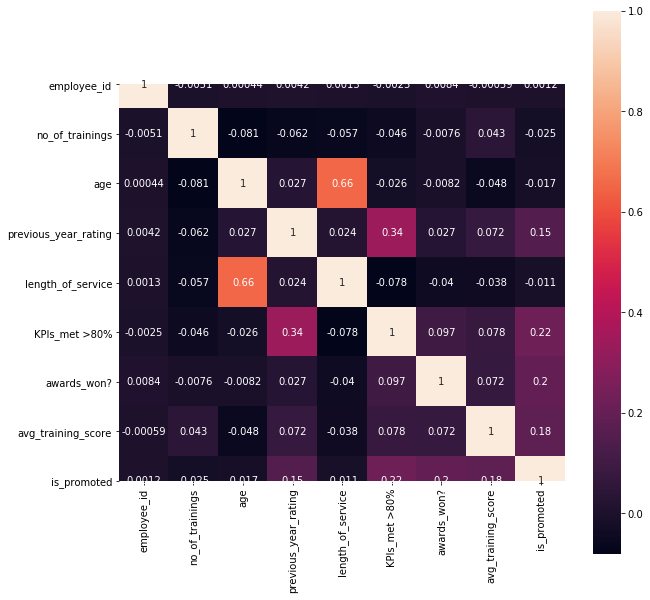

In [23]:
correlation = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.show()

In [24]:
X =train.drop('is_promoted',axis=1)
y = train['is_promoted']

In [25]:
X

,employee_id,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,1,48,3.0,17,0,0,78
54804,74592,Operations,region_27,Master's & above,f,1,37,2.0,6,0,0,56
54805,13918,Analytics,region_1,Bachelor's,m,1,27,5.0,3,1,0,79
54806,13614,Sales & Marketing,region_9,Bachelor's,m,1,29,1.0,2,0,0,45


In [26]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [27]:
    from sklearn.model_selection import train_test_split

In [28]:
train=train.drop('region',axis=1)

In [29]:
train=train.drop('gender',axis=1)

In [30]:
train=train.drop('previous_year_rating',axis=1)

In [31]:
X =train.drop('is_promoted',axis=1)
y = train['is_promoted']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: could not convert string to float: "Master's & above"

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [34]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: could not convert string to float: "Master's & above"

In [35]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: could not convert string to float: 'Technology'

In [36]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: could not convert string to float: 'Technology'

In [37]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields department, education

In [ ]:
train.columns

In [ ]:
g = sns.boxplot(x=train["age"])

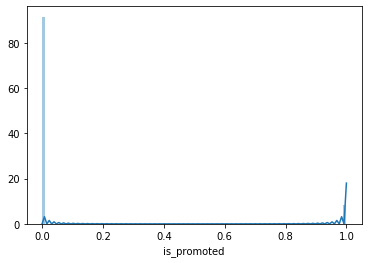

In [38]:
sns.distplot(train.is_promoted, bins=100)

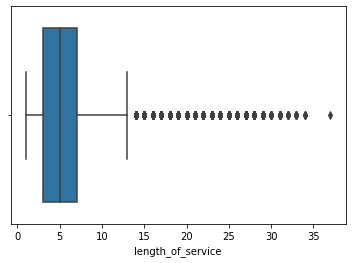

In [39]:
g = sns.boxplot(x=train["length_of_service"])

In [40]:
train_data = train.copy()

In [41]:
train_data

,employee_id,department,education,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,Master's & above,1,35,8,1,0,49,0
1,65141,Operations,Bachelor's,1,30,4,0,0,60,0
2,7513,Sales & Marketing,Bachelor's,1,34,7,0,0,50,0
3,2542,Sales & Marketing,Bachelor's,2,39,10,0,0,50,0
4,48945,Technology,Bachelor's,1,45,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,1,48,17,0,0,78,0
54804,74592,Operations,Master's & above,1,37,6,0,0,56,0
54805,13918,Analytics,Bachelor's,1,27,3,1,0,79,0
54806,13614,Sales & Marketing,Bachelor's,1,29,2,0,0,45,0


In [42]:
train1=pd.read_csv('train3.csv')

In [43]:
train1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [44]:
train3_data=train1.copy()

In [45]:
train3_data.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [46]:
train3_data['department'] = train3_data['department'].replace(['Technology', 'Analytics','R&D'], 'other')
train3_data['department'] = train3_data['department'].replace(['Procurement','Finance','HR','Legal'], 'backend')
train3_data['department'] = train3_data['department'].replace(['Sales & Marketing', 'Operations'], 'frontend')

In [47]:
train3_data.department.value_counts()

frontend    28188
other       13489
backend     13131
Name: department, dtype: int64

In [48]:
train3_data.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [49]:
train3_data["gender"]
train3_data['gender_cat'] = train3_data['gender'].map( {'f':1, 'm':0} )
train3_data.drop('gender', axis=1,inplace = True)

In [50]:
train3_data.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [51]:
train3_data.columns

Index(['employee_id', 'department', 'region', 'education',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'gender_cat'],
      dtype='object')

In [52]:
train3_data_dummies = pd.get_dummies(data=train3_data, columns = ['department', 'region', 'education', 'recruitment_channel'], \
                                   prefix = ['department', 'region', 'education', 'recruitment_channel'])
train3_data_dummies.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_cat,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,1,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,1,0,0,1,0,0


In [53]:
X =train3_data_dummies.drop('is_promoted',axis=1)
y = train3_data_dummies['is_promoted']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
train3_data_dummies.isnull().sum()

employee_id                        0
no_of_trainings                    0
age                                0
previous_year_rating            4124
length_of_service                  0
KPIs_met >80%                      0
awards_won?                        0
avg_training_score                 0
is_promoted                        0
gender_cat                         0
department_backend                 0
department_frontend                0
department_other                   0
region_region_1                    0
region_region_10                   0
region_region_11                   0
region_region_12                   0
region_region_13                   0
region_region_14                   0
region_region_15                   0
region_region_16                   0
region_region_17                   0
region_region_18                   0
region_region_19                   0
region_region_2                    0
region_region_20                   0
region_region_21                   0
r

In [56]:
train3_data_dummies.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [57]:
train3_data_dummies['previous_year_rating'] = train3_data_dummies['previous_year_rating'].fillna(value=train3_data_dummies['previous_year_rating'].median())

In [58]:
train3_data_dummies.isnull().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
gender_cat                      0
department_backend              0
department_frontend             0
department_other                0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_22                0
region_region_23                0
region_region_

In [59]:
X =train3_data_dummies.drop('is_promoted',axis=1)
y = train3_data_dummies['is_promoted']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10044
           1       0.00      0.00      0.00       918

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962

[[10044     0]
 [  918     0]]
accuracy is 0.916256157635468


C:\Users\DEEPAK\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.39%


In [63]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10044
           1       0.35      0.38      0.36       918

    accuracy                           0.89     10962
   macro avg       0.65      0.66      0.65     10962
weighted avg       0.89      0.89      0.89     10962

[[9393  651]
 [ 569  349]]
accuracy is 0.8887064404305783


In [64]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10044
           1       0.33      0.00      0.00       918

    accuracy                           0.92     10962
   macro avg       0.62      0.50      0.48     10962
weighted avg       0.87      0.92      0.88     10962

[[10042     2]
 [  917     1]]
accuracy is 0.9161649334063127


In [65]:
train3_data_dummies.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'gender_cat', 'department_backend',
       'department_frontend', 'department_other', 'region_region_1',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_region_6',
       'region_region_7', 'region_region_8', 'region_r

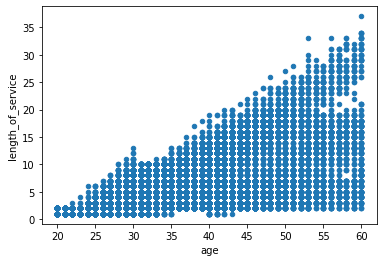

In [66]:
train3_data_dummies.plot(kind='scatter', x='age', y='length_of_service');

In [67]:
X =train3_data_dummies.drop('is_promoted',axis=1)
y = train3_data_dummies['is_promoted']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [69]:
from sklearn import tree

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(X_train, y_train)

dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.9230716599005611
Testing score:  0.9217296113847838


In [70]:
train3_data_dummies.isnull().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
gender_cat                      0
department_backend              0
department_frontend             0
department_other                0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_22                0
region_region_23                0
region_region_

In [71]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt2.fit(X_train, y_train)

dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.9230716599005611
Testing score:  0.9217296113847838


In [72]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt2.fit(X_train, y_train)

dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.9257400903161064
Testing score:  0.9241014413428207


In [73]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dt2.fit(X_train, y_train)

dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.9259453541942252
Testing score:  0.9241926655719759


In [74]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt2.fit(X_train, y_train)

dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.9295944898052274
Testing score:  0.9259259259259259


In [75]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=10)
dt2.fit(X_train, y_train)

dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.9387857501254391
Testing score:  0.9294836708629812


In [76]:
dt2 = tree.DecisionTreeClassifier()
dt2.fit(X_train, y_train)

dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  1.0
Testing score:  0.8804050355774494


In [77]:
features = train3_data_dummies.columns.tolist()

In [78]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(X_train, y_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

employee_id......... 0.0
no_of_trainings..... 0.0
age................. 0.0
previous_year_rating 0.0
length_of_service... 0.0
KPIs_met >80%....... 0.31846495465864816
awards_won?......... 0.0
avg_training_score.. 0.662579488790465
is_promoted......... 0.0
gender_cat.......... 0.0
department_backend.. 0.0
department_frontend. 0.0189555565508868
department_other.... 0.0
region_region_1..... 0.0
region_region_10.... 0.0
region_region_11.... 0.0
region_region_12.... 0.0
region_region_13.... 0.0
region_region_14.... 0.0
region_region_15.... 0.0
region_region_16.... 0.0
region_region_17.... 0.0
region_region_18.... 0.0
region_region_19.... 0.0
region_region_2..... 0.0
region_region_20.... 0.0
region_region_21.... 0.0
region_region_22.... 0.0
region_region_23.... 0.0
region_region_24.... 0.0
region_region_25.... 0.0
region_region_26.... 0.0
region_region_27.... 0.0
region_region_28.... 0.0
region_region_29.... 0.0
region_region_3..... 0.0
region_region_30.... 0.0
region_region_31.... 0.0
regio

IndexError: index 52 is out of bounds for axis 0 with size 52

In [80]:
from sklearn import metrics

In [81]:
preds = dt2.predict(X_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(y_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(X_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(y_test, probs)))


Accuracy score: 
0.9217296113847838

Area Under Curve: 
0.7264089767995693


In [88]:
count_class_0, count_class_1 = train3_data_dummies.is_promoted.value_counts()

In [89]:
df_class_0 = train3_data_dummies[train3_data_dummies['is_promoted'] == 0]
df_class_1 = train3_data_dummies[train3_data_dummies['is_promoted'] == 1]

In [90]:
df_class_0.shape, df_class_1.shape

((50140, 53), (4668, 53))

Random under-sampling:
1    4668
0    4668
Name: is_promoted, dtype: int64


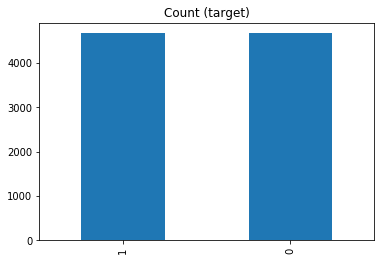

In [92]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.is_promoted.value_counts())

df_test_under.is_promoted.value_counts().plot(kind='bar', title='Count (target)');

In [93]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10014
           1       1.00      0.00      0.00       948

    accuracy                           0.91     10962
   macro avg       0.96      0.50      0.48     10962
weighted avg       0.92      0.91      0.87     10962

[[10014     0]
 [  947     1]]
accuracy is 0.9136106549899653


In [94]:
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt2.fit(X_train, y_train)

dt2_score_train = dt2.score(X_train, y_train)
print("Training score: ",dt2_score_train)

dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.9230716599005611
Testing score:  0.9217296113847838


In [96]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
print (X_ros.shape, X.shape)



45472 new random picked points
(100280, 52) (54808, 52)


In [97]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10014
           1       1.00      0.00      0.00       948

    accuracy                           0.91     10962
   macro avg       0.96      0.50      0.48     10962
weighted avg       0.92      0.91      0.87     10962

[[10014     0]
 [  947     1]]
accuracy is 0.9136106549899653


In [100]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)
print(X_rus.shape[0] - X.shape[0], 'new random picked points')
print (X_rus.shape, X.shape)


-45472 new random picked points
(9336, 52) (54808, 52)


In [101]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10014
           1       1.00      0.00      0.00       948

    accuracy                           0.91     10962
   macro avg       0.96      0.50      0.48     10962
weighted avg       0.92      0.91      0.87     10962

[[10014     0]
 [  947     1]]
accuracy is 0.9136106549899653


In [102]:
    from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [103]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     10018
           1       0.67      0.00      0.00       944

    accuracy                           0.91     10962
   macro avg       0.79      0.50      0.48     10962
weighted avg       0.89      0.91      0.87     10962

[[10017     1]
 [  942     2]]
accuracy is 0.9139755519065864


In [106]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
